## Computational Homework Sheet 5

We have tried our best to make sense of the algorithm. Sorry if this is inconvenient for you to go through the code. <br>
-Aleena, Kriti

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def Ham(u,a,N):
    H = 0
    for i in range(N):
        H += (u[i] - u[i-1])**2
    
    return H/a
    
def hastings(u,x,phi,nlevel): 
    
    Ei= Ha(u,phi,nlevel)
    r = np.random.uniform(-1,1)
    u[x] = u[x] + delta*r
    Ef=Ha(u,phi,nlevel)
    dE=Ef-Ei
    if (dE < 0 or np.random.uniform(0,1) < np.exp(-dE)):
        u[x]=u[x]
       
        
    else:
        u[x]-=r*delta
      
    return u


def H2a(ucor1,phi,nlevel): #computes hamiltonian of the lattice at a particular level, a=1
    n2 = int(len(ucor1))
    he = 0
    hi = 0
    phia = np.zeros(n2)
    
    for i in range(n2): ##phi(2a)
        phi_n = 0.5*(phi[2*i] + 0.5*phi[2*i-1] + 0.5*phi[2*i+1])
        phia[i] = phi_n
        he += nlevel*phi_n*ucor1[i]
        hi += ((ucor1[i]-ucor1[i-1])**2)/nlevel
        
    Ham = he+hi
    return Ham,phia
        
    
def Ha(u,phi,nlevel):
    H = 0
    N = len(u)
    for i in range(N):
        H += ((u[i] - u[i-1])**2)/nlevel  + nlevel*phi[i]*u[i]
        
    return H

def autocor(marr):
    
    gamma = np.zeros(50)
    mavg = np.mean(marr)
    for tau in tqdm(range(50)):
        count = 0
        for k in range(len(marr)):
        
            for l in range(len(marr)):
                
                if(abs(k-l) == tau):          
                    count+=1
                    gamma[tau] += (marr[k] - mavg)*(marr[l] - mavg)

        gamma[tau] *= 1/count
    
    Ctau = gamma/gamma[0]
    return Ctau

In [3]:
a =1.
N = 64
delta = 2.
Marr = []

u = np.zeros(N)
u[0],u[N-1] = 0,0
#def hastings(u,x,phi,nlevel,N):
phi = np.zeros(N)

for i in range(N-1):  
    x = np.random.randint(1,N-2)
    Ei = Ha(u,phi,1)
    r = np.random.uniform(-1,1)
    u[x] += delta*r
    Ef = Ha(u,phi,1)
    dE=Ef-Ei
    if (dE < 0 or np.random.uniform(0,1) < np.exp(-dE)):
        u[x]=u[x]
       
        
    else:
        u[x]-=r*delta
        
    Marr.append(np.sum(u)/N)
    
   


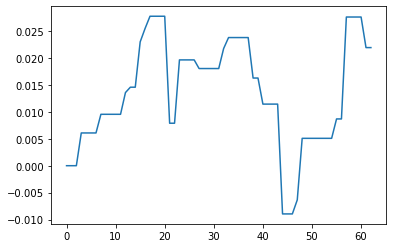

In [4]:
plt.plot(Marr)

## V Cycle

In [5]:
N = 64
vpre = int(N/2)
vpost = int(N/2)

delta = 2.
Marr = []


    

 #   def Ha(u,phi,nlevel,N)
    
u = np.zeros(N)
u[0],u[N-1] = 0,0
phia = np.zeros(N)

## Pre-coarsening Steps

for j in range(vpre):
    for i in range(N-1):  
        x = np.random.randint(1,N-2)
        Ei = Ha(u,phi,1)
        r = np.random.uniform(-1,1)
        u[x] += delta*r
        Ef = Ha(u,phi,1)
        dE=Ef-Ei
        if (dE < 0 or np.random.uniform(0,1) < np.exp(-dE)):
            u[x]=u[x]


        else:
            u[x]-=r*delta
   


In [6]:
ucor=np.zeros(int(N/2))
ucor1=np.zeros(int(N/4))
ucor2=np.zeros(int(N/8))

for i in range(int(N/2)):
    ucor[i]=u[2*i]
H_2a,phi2a = H2a(ucor,phia,2)


for i in range(int(N/4)):
    ucor1[i]=u[4*i]
H_4a,phi4a = H2a(ucor1,phi2a,4)


for i in range(int(N/8)):
    ucor2[i]=u[8*i]
H_8a,phi8a = H2a(ucor2,phi4a,8)


Mcor =[]   

#Metropolis step after coarsening 3 times

#def hastings(u,x,phi,nlevel,N):
nl = int(N/8)
for j in range(vpost):
    for i in range(nl-1):
        x = np.random.randint(1,nl-2)
        ucor2 = hastings(ucor2,x,phi8a,8)
        Mcor.append(np.sum(ucor2)/nl)
        


In [7]:
## coarse to fine --> 3 levels
ufine=np.zeros(N)
ufine1=np.zeros(int(N/2))
ufine2=np.zeros(int(N/4))

#Prolongation for third level
for i in range(int(N/4)-1):
    if(i%2==0):
        ufine2[i]=ucor2[int(i/2)]
    else:
        ip = int((i+1)/2)
        im = int((i-1)/2)
        
        ufine2[i]=(ucor2[im]+ucor2[ip])/2

#Interpolation for second level
for i in range(int(N/2)-1):
    if(i%2==0):
        ufine1[i]=ufine2[int(i/2)]
    else:
        ip = int((i+1)/2)
        im = int((i-1)/2)
        ufine1[i]=(ufine2[im]+ufine2[ip])/2     

        
#Prolongation for first level
for i in range(N-1):
    if(i%2==0):
        ufine[i]=ufine1[int(i/2)]
    else:
        ip = int((i+1)/2)
        im = int((i-1)/2)
        ufine[i]=(ufine1[im]+ufine1[ip])/2
        
Mfinal=[] 

for i in range(N-1):
    
    #Ei = Ha(ufine,x,1)
    x = np.random.randint(1,N-2)
    ufine = hastings(ufine,x,phi,1)
    Mfinal.append((np.sum(ufine))**2/N**2)
        


In [8]:
corr1 = autocor(Mfinal)

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 724.50it/s]


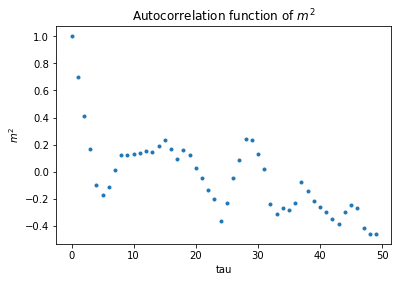

In [9]:
plt.title('Autocorrelation function of $m^2$')
plt.xlabel('tau')
plt.ylabel('$m^2$')
plt.plot((corr1),'.')


## W Cycle

In [10]:
N = 64
vpre = int(N/2)
vpost = int(N/2)

delta = 2.
Marr = []


    

 #   def Ha(u,phi,nlevel,N)
    
u = np.zeros(N)
u[0],u[N-1] = 0,0
phia = np.zeros(N)

## Pre-coarsening Steps

for j in range(vpre):
    for i in range(N-1):  
        x = np.random.randint(1,N-2)
        Ei = Ha(u,phi,1)
        r = np.random.uniform(-1,1)
        u[x] += delta*r
        Ef = Ha(u,phi,1)
        dE=Ef-Ei
        if (dE < 0 or np.random.uniform(0,1) < np.exp(-dE)):
            u[x]=u[x]


        else:
            u[x]-=r*delta
   


In [11]:
ucor=np.zeros(int(N/2))
ucor1=np.zeros(int(N/4))
ucor2=np.zeros(int(N/8))

for i in range(int(N/2)):
    ucor[i]=u[2*i]
H_2a,phi2a = H2a(ucor,phia,2)


for i in range(int(N/4)):
    ucor1[i]=u[4*i]
H_4a,phi4a = H2a(ucor1,phi2a,4)


for i in range(int(N/8)):
    ucor2[i]=u[8*i]
H_8a,phi8a = H2a(ucor2,phi4a,8)
 

#Metropolis step after coarsening 3 times

#def hastings(u,x,phi,nlevel,N):
nl = int(N/8)
for j in range(vpost):
    for i in range(nl-1):
        x = np.random.randint(1,nl-2)
        ucor2 = hastings(ucor2,x,phi8a,8)


 
## Uncoarsen it 
ufine2=np.zeros(int(N/4))

#Prolongation for third level
for i in range(int(N/4)-1):
    if(i%2==0):
        ufine2[i]=ucor2[int(i/2)]
    else:
        ip = int((i+1)/2)
        im = int((i-1)/2)
        
        ufine2[i]=(ucor2[im]+ucor2[ip])/2

        
for j in range(vpost):
    for i in range(nl-1):
        x = np.random.randint(1,nl-2)
        ucor2 = hastings(ucor2,x,phi8a,8)

        
#Coarsen it again
for i in range(int(N/8)):
    ucor2[i] = ufine2[2*i]
H_8a,phi8a = H2a(ucor2,phi4a,8)


nl = int(N/8)
for j in range(vpost):
    for i in range(nl-1):
        x = np.random.randint(1,nl-2)
        ucor2 = hastings(ucor2,x,phi8a,8)
        Mcor.append(np.sum(ucor2)/nl)
        
        
## coarse to fine --> 3 levels
ufine=np.zeros(N)
ufine1=np.zeros(int(N/2))
ufine2=np.zeros(int(N/4))

#Prolongation for third level
for i in range(int(N/4)-1):
    if(i%2==0):
        ufine2[i]=ucor2[int(i/2)]
    else:
        ip = int((i+1)/2)
        im = int((i-1)/2)
        
        ufine2[i]=(ucor2[im]+ucor2[ip])/2

#Prolongation for second level
for i in range(int(N/2)-1):
    if(i%2==0):
        ufine1[i]=ufine2[int(i/2)]
    else:
        ip = int((i+1)/2)
        im = int((i-1)/2)
        ufine1[i]=(ufine2[im]+ufine2[ip])/2     

        
#Prolongation for first level
for i in range(N-1):
    if(i%2==0):
        ufine[i]=ufine1[int(i/2)]
    else:
        ip = int((i+1)/2)
        im = int((i-1)/2)
        ufine[i]=(ufine1[im]+ufine1[ip])/2
        
MfinalW=[] 

for i in range(N-1):
    
    #Ei = Ha(ufine,x,1)
    x = np.random.randint(1,N-2)
    ufine = hastings(ufine,x,phi,1)
    MfinalW.append((np.sum(ufine))**2/N**2)        
                





100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 833.10it/s]


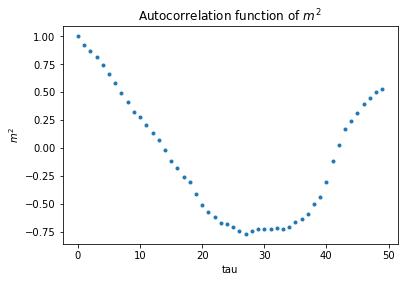

In [12]:
corr = autocor(MfinalW)
plt.title('Autocorrelation function of $m^2$')
plt.xlabel('tau')
plt.ylabel('$m^2$')
plt.plot((corr),'.')
